In [86]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
# Loading the data
df = pd.read_csv('google_cleaned.csv')
df.head() # Viewing the first few rows of the dataset

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


## DATA CLEANING

In [88]:
# Dropping unwanted column
df.drop("Unnamed: 0", axis=1, inplace=True) #Column Unnamed: 0 is not needed since it is just an index column

In [89]:
# Standardizing column names
df.columns = df.columns.str.strip().str.replace(" ", "_").str.title()

In [90]:
df.columns # Check the updated column names

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver', 'Day', 'Month', 'Year'],
      dtype='object')

In [91]:
df.dtypes # Check data types of columns

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price             float64
Content_Rating     object
Genres             object
Last_Updated       object
Current_Ver        object
Android_Ver        object
Day                 int64
Month               int64
Year                int64
dtype: object

In [92]:
#Converting 'Last_Updated' to datetime data type
df["Last_Updated"] = pd.to_datetime(df["Last_Updated"])

In [93]:
# Dropping the day, month and year columns as they are redundant after converting 'Last_Updated' to datetime
df.drop(["Day", "Month", "Year"], axis=1, inplace=True)
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

In [94]:
# Viewing tht shape of the data
df.shape

(10840, 13)

In [95]:
# Viewing the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content_Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last_Updated    10840 non-null  datetime64[ns]
 11  Current_Ver     10832 non-null  object        
 12  Android_Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.1+ MB


In [96]:
# Viewing the statistical summary of numerical columns
df.describe()

,Rating,Reviews,Size,Installs,Price,Last_Updated
count,9366.000000,1.084000e+04,9145.000000,1.084000e+04,10840.000000,10840
mean,4.191757,4.441529e+05,19579.419913,1.546434e+07,1.027368,2017-11-21 06:43:02.435424256
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000,2010-05-21 00:00:00
25%,4.000000,3.800000e+01,5.600000,1.000000e+03,0.000000,2017-09-20 00:00:00
50%,4.300000,2.094000e+03,13000.000000,1.000000e+05,0.000000,2018-05-24 00:00:00
75%,4.500000,5.477550e+04,30000.000000,5.000000e+06,0.000000,2018-07-20 00:00:00
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000,2018-08-08 00:00:00
std,0.515219,2.927761e+06,24042.062020,8.502936e+07,15.949703,NaN


In [97]:
# Checking for missing values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content_Rating       0
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          2
dtype: int64

In [98]:
# Filling the rating column with median value category wise
df['Rating'] = df.groupby('Category')['Rating'].transform(lambda x: x.fillna(x.median()))

In [99]:
# Creating a new column to indicate missing values in 'Size' column
df['Size_missing'] = df['Size'].isna()

In [100]:
# Dropping null values in current_ver and android_ver columns
df.dropna(subset=['Current_Ver', 'Android_Ver'], inplace=True)

In [101]:
# Check for duplicate values
df.duplicated().sum()

np.int64(483)

In [102]:
df[df.duplicated()].head() # Viewing duplicate rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Size_missing
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,True
236,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device,True
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up,True
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000.0,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up,False
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up,True


In [103]:
# Dropping the duplicate values
df.drop_duplicates(inplace=True)

In [104]:
# Viewing the shape of the cleaned data
df.shape

(10347, 14)

## DATA ANALYSIS AND VISUALIZATION

### *Are there any apps having reviews more than their installs?*

In [105]:
df[df["Reviews"] > df["Installs"]].shape # Checking for rows where reviews are greater than installs, which is not possible

(11, 14)

In [106]:
df.loc[df['Reviews'] > df['Installs'], 'Reviews'] = df['Installs'] # Capping the reviews to installs
df[df["Reviews"] > df["Installs"]].shape

(0, 14)

### *Show the distribution of key numeric features*

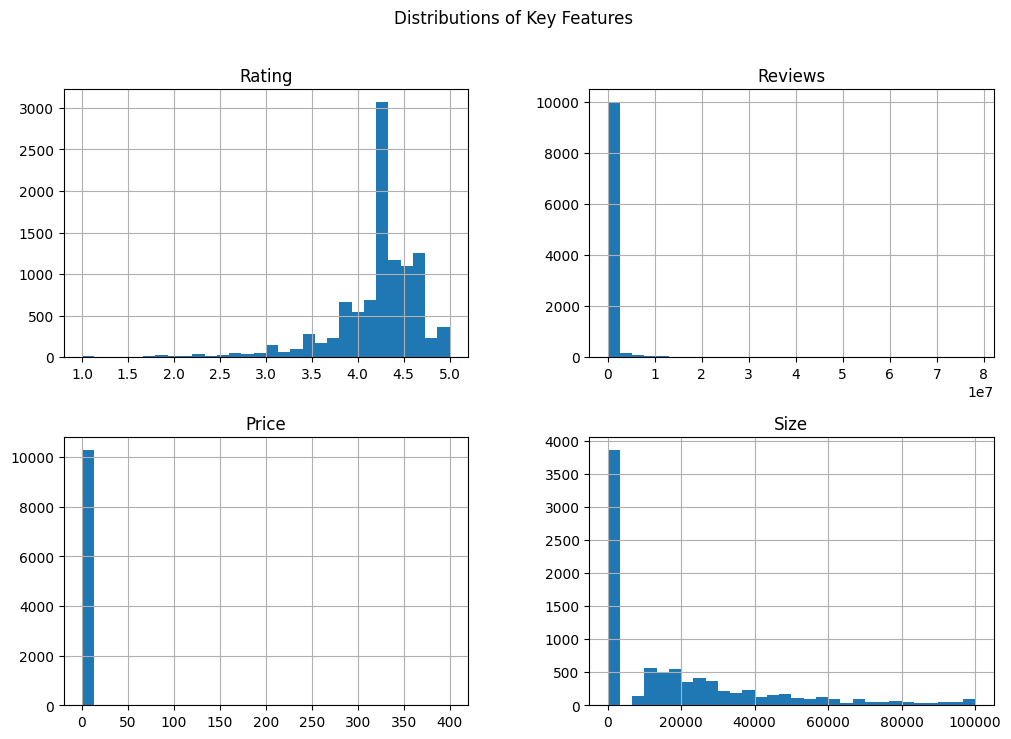

In [107]:
# Plotting the histograms of key features
df[['Rating','Reviews','Price','Size']].hist(bins=30, figsize=(12,8))
plt.suptitle("Distributions of Key Features")
plt.show()

### *Which category has the highest number of installs?*

In [108]:
# Which category has the highest number of installs?
count_category = df.groupby('Category')['Installs'].sum().sort_values(ascending=False)
count_category

Category
GAME                   31544024415
COMMUNICATION          24152276251
SOCIAL                 12513867902
PRODUCTIVITY           12463091369
TOOLS                  11452271905
FAMILY                 10041632405
PHOTOGRAPHY             9721247655
TRAVEL_AND_LOCAL        6361887146
VIDEO_PLAYERS           6222002720
NEWS_AND_MAGAZINES      5393217760
SHOPPING                2573348785
ENTERTAINMENT           2455660000
PERSONALIZATION         2074483782
BOOKS_AND_REFERENCE     1916468576
SPORTS                  1528574498
HEALTH_AND_FITNESS      1361022512
BUSINESS                 863664865
FINANCE                  770348734
MAPS_AND_NAVIGATION      724281890
LIFESTYLE                534823539
EDUCATION                533952000
WEATHER                  426100520
FOOD_AND_DRINK           257898751
DATING                   206536107
HOUSE_AND_HOME           125212461
ART_AND_DESIGN           124333100
LIBRARIES_AND_DEMO        61995910
COMICS                    56086150
AUTO_AND_VE

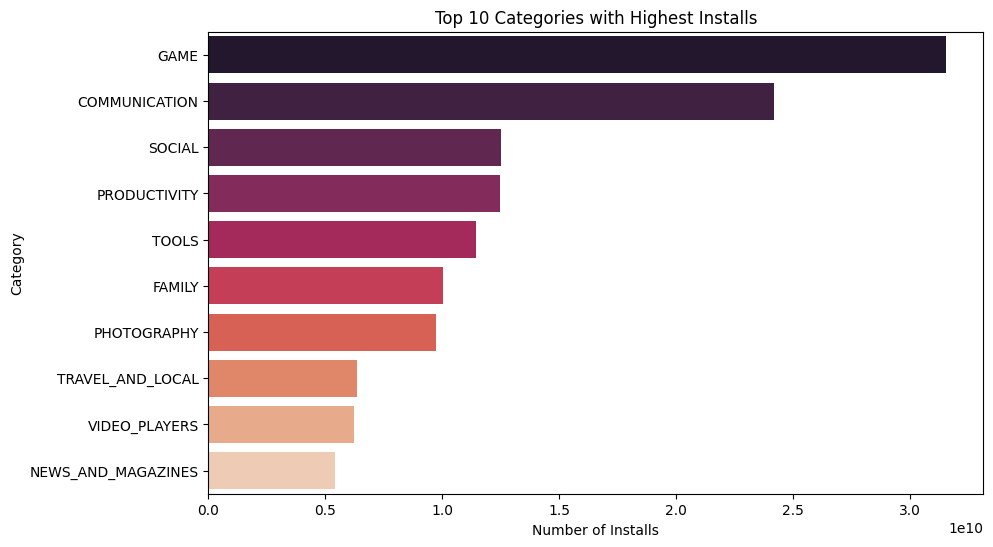

In [109]:
# Plotting the top 10 categories with highest installs using horizontal bar plot in descending order
plt.figure(figsize=(10,6))
sns.barplot(x=count_category.head(10).values, y=count_category.head(10).index, palette='rocket', hue=count_category.head(10).index, legend=False)
plt.title('Top 10 Categories with Highest Installs')
plt.xlabel("Number of Installs")
plt.ylabel("Category")
plt.show()

### *Correlation between numerical columns*

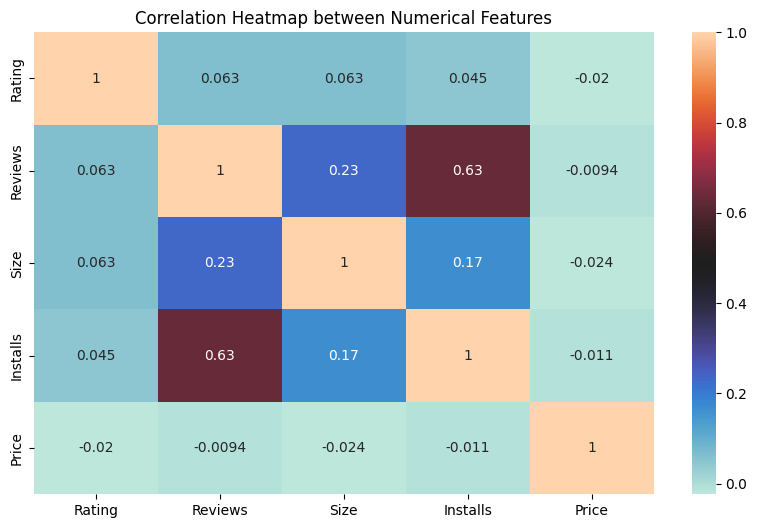

In [110]:
# Correlation heatmap between numerical features
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='icefire')
plt.title('Correlation Heatmap between Numerical Features')
plt.show()

### *How many free and paid apps are present and which has more average ratings?*

In [111]:
df["Type"].value_counts() # Viewing the counts of free and paid apps

Type
Free    9584
Paid     762
Name: count, dtype: int64

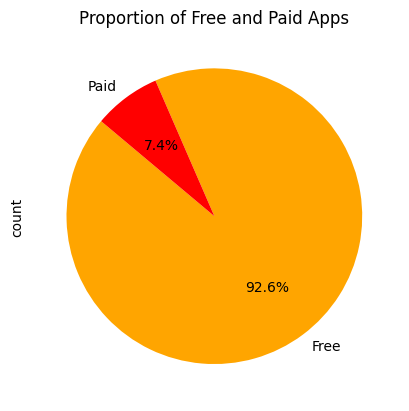

In [112]:
# Plotting the proportion of free and paid apps using pie chart
df["Type"].value_counts().plot(kind='pie', autopct = '%1.1f%%', colors=['orange', 'red'], startangle=140)
plt.title('Proportion of Free and Paid Apps')
plt.show()

In [113]:
# Which type of app has higher average rating?
avg_rating_type = df.groupby('Type')['Rating'].mean()
avg_rating_type

Type
Free    4.198278
Paid    4.275853
Name: Rating, dtype: float64

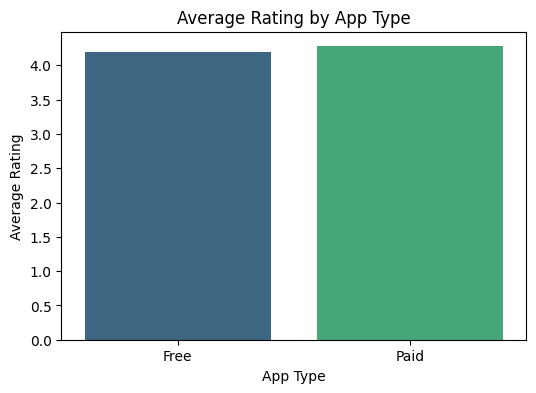

In [114]:
# Plotting average rating by app type
plt.figure(figsize=(6,4))
sns.barplot(x=avg_rating_type.index, y=avg_rating_type.values, palette='viridis', hue= avg_rating_type.index, legend=False)
plt.title('Average Rating by App Type')
plt.xlabel('App Type')
plt.ylabel('Average Rating')
plt.show()

### *Plot the price distribution of paid apps. What is the average price per category for paid apps?*

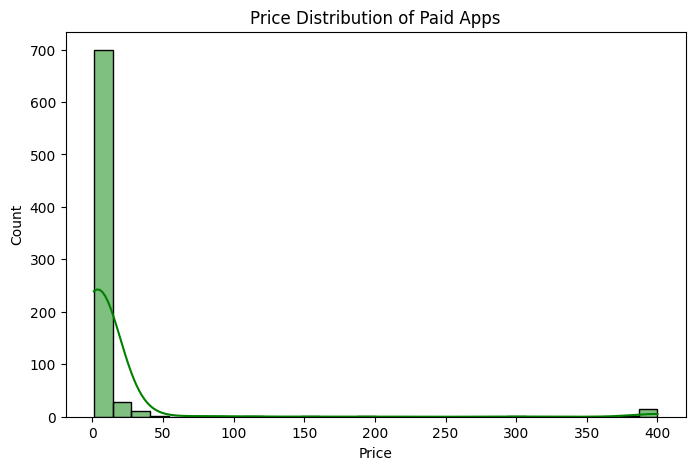

In [115]:
# Plotting the price distribution of paid apps
plt.figure(figsize=(8,5))
sns.histplot(df[df['Type']=='Paid']['Price'], bins=30, kde=True, color='green')
plt.title('Price Distribution of Paid Apps')
plt.show()

In [116]:
# Average price per category of only paid apps as a pivot table
avg_price_category = df[df['Type']=='Paid'].pivot_table(values='Price', index='Category', aggfunc='mean').sort_values(by='Price', ascending=False)
avg_price_category

,Price
Category,
FINANCE,170.637059
LIFESTYLE,124.256316
EVENTS,109.990000
BUSINESS,14.607500
FAMILY,13.009839
MEDICAL,12.151071
PRODUCTIVITY,8.961786
PHOTOGRAPHY,6.111500
MAPS_AND_NAVIGATION,5.390000


### *Do certain content ratings (Teen, Everyone, Mature) dominate installs?*

In [117]:
# Which Content_Rating has most number of installs
content_rating_stats = df.groupby('Content_Rating').agg({
    'Installs': 'sum'
}).sort_values(by='Installs', ascending=False)
content_rating_stats

,Installs
Content_Rating,
Everyone,100228037851
Teen,30918280393
Everyone 10+,11191271795
Mature 17+,4290696878
Adults only 18+,2000000
Unrated,50500


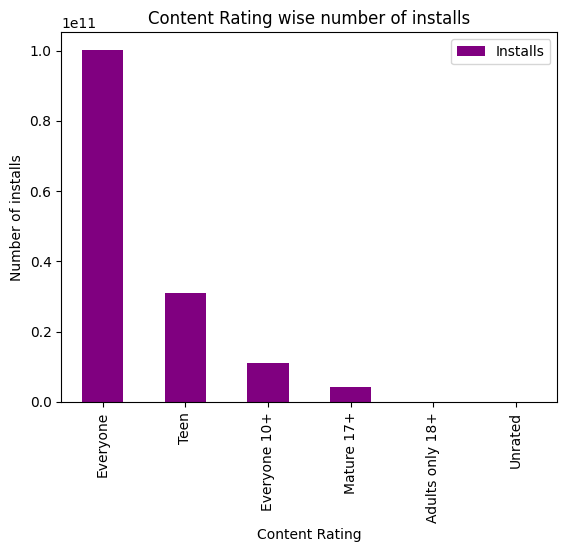

In [118]:
# Plotting the content_rating_stats
content_rating_stats.plot(kind="bar", color= "Purple")
plt.title("Content Rating wise number of installs")
plt.xlabel("Content Rating")
plt.ylabel("Number of installs")
plt.xticks(rotation= 90)
plt.show()

### *What pricing range gives the best value-per-rating?*

In [119]:
# At what price do users feel they get the best value?
paid = df[df["Type"] == "Paid"].copy()# Taking only paid apps
price_bins = [0, 1, 5, 10, 20, 50, 100] # Creating bins for the price
price_labels = ['<$1', '$1–5', '$5–10', '$10–20', '$20–50', '$50+'] # Creating labels for the price bins
# Creating a new column to categorize the price
paid['Price_band'] = pd.cut(paid['Price'], bins=price_bins, labels=price_labels)
value_per_rating = (paid.groupby('Price_band', observed=True)['Rating'].mean().sort_values(ascending=False)) # Calculating the average rating for each price band

value_per_rating

Price_band
$50+      4.400000
<$1       4.312925
$5–10     4.294253
$1–5      4.276600
$10–20    4.254286
$20–50    4.211765
Name: Rating, dtype: float64

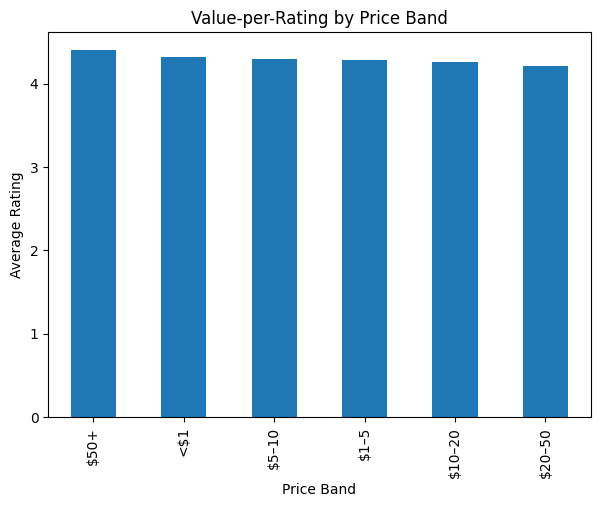

In [120]:
# Plotting the value_per_rating
value_per_rating.plot(kind='bar', figsize=(7,5))
plt.title("Value-per-Rating by Price Band")
plt.xlabel("Price Band")
plt.ylabel("Average Rating")
plt.show()

### *Is there a rating threshold for success?*

In [121]:
#Do apps below a certain rating fail commercially?
bins = [0, 2, 3, 4, 5]
labels = ['Very Low (<2)', 'Low (2-3)', 'Medium (3-4)', 'High (4-5)']

df['Rating_Band'] = pd.cut(df['Rating'], bins=bins, labels=labels)
rating_success = df.groupby('Rating_Band')['Installs'].agg(count='count', avg_installs='mean', median_installs='median').reset_index()

rating_success

C:\Users\Harijith\AppData\Local\Temp\ipykernel_12560\1716540625.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_success = df.groupby('Rating_Band')['Installs'].agg(count='count', avg_installs='mean', median_installs='median').reset_index()


,Rating_Band,count,avg_installs,median_installs
0,Very Low (<2),67,9.099440e+04,1000.0
1,Low (2-3),295,1.856113e+05,10000.0
2,Medium (3-4),2120,8.382371e+06,100000.0
3,High (4-5),7865,1.637621e+07,100000.0


<Figure size 800x500 with 0 Axes>

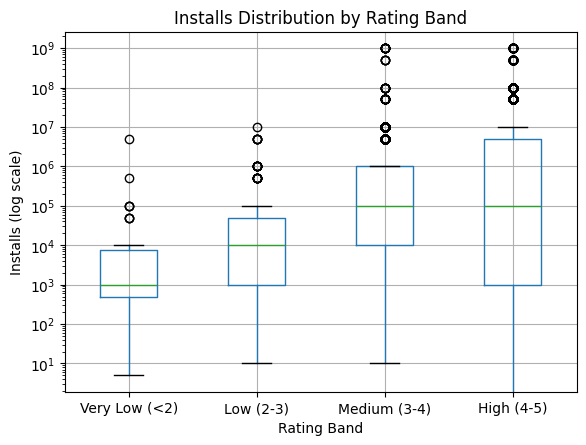

In [122]:
plt.figure(figsize=(8,5))
df.boxplot(column='Installs', by='Rating_Band')
plt.yscale('log')   # very important (installs are skewed)
plt.title('Installs Distribution by Rating Band')
plt.suptitle('')
plt.xlabel('Rating Band')
plt.ylabel('Installs (log scale)')
plt.show()

### *Do apps updated more recently have higher ratings or installs?*

In [123]:
df['Days_Since_Update'] = (pd.Timestamp.today() - df['Last_Updated']).dt.days # Calculating the number of days since the last update
df[['Days_Since_Update','Rating','Installs']].corr() # Checking the correlation between days since update, rating and installs

,Days_Since_Update,Rating,Installs
Days_Since_Update,1.000000,-0.125839,-0.098682
Rating,-0.125839,1.000000,0.044647
Installs,-0.098682,0.044647,1.000000


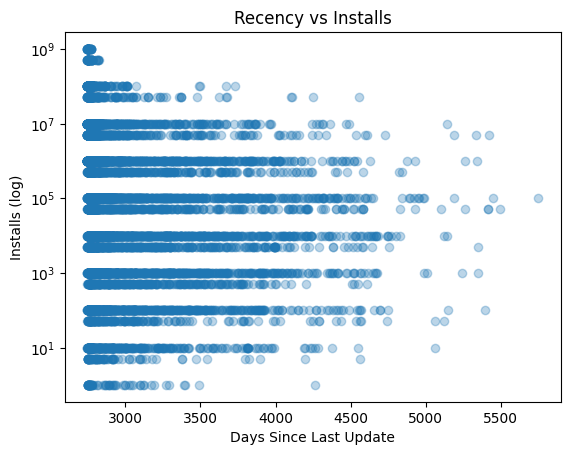

In [124]:
# Plotting the relationship between days since last update and installs
plt.scatter(df['Days_Since_Update'], df['Installs'], alpha=0.3)
plt.yscale('log')
plt.xlabel("Days Since Last Update")
plt.ylabel("Installs (log)")
plt.title("Recency vs Installs")
plt.show()

### *Are small apps more loved?*

In [125]:
df['Size_bin'] = pd.qcut(df['Size'], 5) # Creating quantile-based bins for the Size column to analyze the relationship between app size and rating
size_rating = df.groupby('Size_bin')['Rating'].mean() # Calculating the average rating for each size bin
size_rating

C:\Users\Harijith\AppData\Local\Temp\ipykernel_12560\3326659157.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_rating = df.groupby('Size_bin')['Rating'].mean() # Calculating the average rating for each size bin


Size_bin
(0.999, 4.4]           4.168785
(4.4, 9.9]             4.179556
(9.9, 18000.0]         4.179933
(18000.0, 36000.0]     4.186149
(36000.0, 100000.0]    4.247503
Name: Rating, dtype: float64

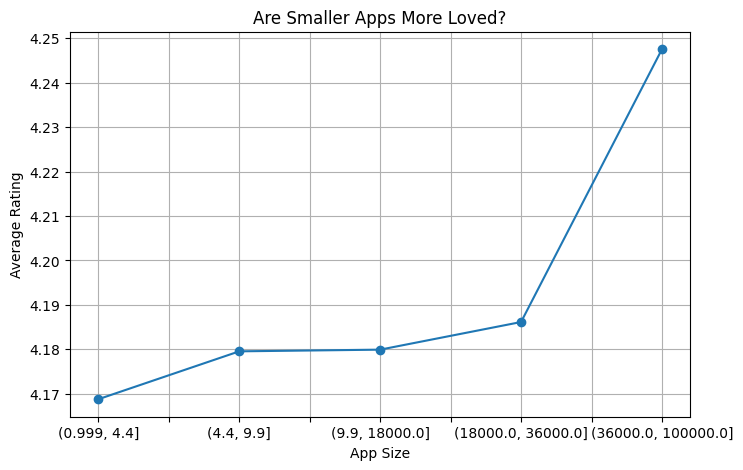

In [126]:
# Plotting the relationship between app size and average rating
plt.figure(figsize=(8,5))
size_rating.plot(marker='o')
plt.xlabel("App Size")
plt.ylabel("Average Rating")
plt.title("Are Smaller Apps More Loved?")
plt.grid(True)
plt.show()

##### This analysis shows that some factors are much more important than others for an app to succeed on the Play Store. Ratings have a very strong effect on installs. Apps with ratings below 3 stars usually get very few users, while apps above 3 stars can suddenly grow very fast and reach a large number of installs.

##### Interestingly, larger apps in this dataset receive higher ratings. This is likely because bigger apps are more developed, have more features, and are better maintained, not because they are unnecessarily large.

##### All price bands have high ratings, which suggests that users are willing to pay as long as the app delivers value — poor paid apps simply do not survive long enough to appear in the data. Overall, user feedback like ratings and reviews is a better indicator of success than technical factors, which means good user experience and product quality matter the most for long-term growth.